#### Import the libraries

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import pandas as pd  # data preprocessing
import numpy as np   # mathematical operations
import matplotlib.pyplot as plt # viz

#### Read the dataset

In [22]:
df = pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [23]:
df.shape

(1000, 16)

#### Function to count Null and Percent of Null Values per Column

In [24]:
def fetch_null_count_and_percent(data):
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]            # Series
    nv_df = pd.DataFrame({'Feature':nv.index,'Null_Count':nv.values,
                         "Percent_Null":(nv.values/data.shape[0])*100})
    nv_df = nv_df.sort_values('Percent_Null',ascending=False)
    return nv_df

In [25]:
nv_df = fetch_null_count_and_percent(df)
nv_df

,Feature,Null_Count,Percent_Null
2,Gross,169,16.9
1,Meta_score,157,15.7
0,Certificate,101,10.1


In [29]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

#### Inconsistent Columns = Releaseed_year,Runtime,Gross

In [30]:
df['Released_Year'].value_counts()

2014    32
2004    31
2009    29
2013    28
2016    28
        ..
1926     1
1936     1
1924     1
1921     1
PG       1
Name: Released_Year, Length: 100, dtype: int64

In [31]:
df = df[df['Released_Year']!='PG']
df.shape

(999, 16)

In [32]:
df['Released_Year']  = df['Released_Year'].astype(int)

In [33]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int32
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [35]:
df['Runtime'].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [36]:
df['Runtime'] = df['Runtime'].str.replace(' min','')

In [37]:
df['Runtime'].unique()

array(['142', '175', '152', '202', '96', '201', '154', '195', '148',
       '139', '178', '161', '179', '136', '146', '124', '133', '160',
       '132', '153', '169', '130', '125', '189', '116', '127', '118',
       '121', '207', '122', '106', '112', '151', '150', '155', '119',
       '110', '88', '137', '89', '165', '109', '102', '87', '126', '147',
       '117', '181', '149', '105', '164', '170', '98', '101', '113',
       '134', '229', '115', '143', '95', '104', '123', '131', '108', '81',
       '99', '114', '129', '228', '128', '103', '107', '68', '138', '156',
       '167', '163', '186', '321', '135', '140', '180', '158', '210',
       '86', '162', '177', '204', '91', '172', '45', '145', '100', '196',
       '93', '120', '92', '144', '80', '183', '111', '141', '224', '171',
       '188', '94', '185', '85', '205', '212', '238', '72', '67', '76',
       '159', '83', '90', '84', '191', '197', '174', '97', '75', '157',
       '209', '82', '220', '64', '184', '168', '166', '192', '194'

In [38]:
df['Runtime']  = df['Runtime'].astype(int)

In [39]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [40]:
df['Gross'].value_counts()

4,360,000      5
25,000,000     2
5,450,000      2
5,321,508      2
9,600,000      2
              ..
106,662        1
10,950         1
4,018,695      1
141,319,928    1
30,500,000     1
Name: Gross, Length: 822, dtype: int64

In [41]:
df['Gross'] = df['Gross'].str.replace(',','')

In [42]:
df['Gross'].value_counts()

4360000      5
25000000     2
5450000      2
5321508      2
9600000      2
            ..
106662       1
10950        1
4018695      1
141319928    1
30500000     1
Name: Gross, Length: 822, dtype: int64

In [44]:
df['Gross'] = pd.to_numeric(df['Gross'])

In [45]:
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [46]:
df.drop('Poster_Link',axis=1,inplace=True)

In [47]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

In [48]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


In [49]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#### Top N movies with highest IMDB_Rating

In [202]:
def top_N_titles_with_highest_imdb_rating(data,N):
    w = data[['Series_Title','IMDB_Rating']].sort_values('IMDB_Rating',ascending=False).head(N)
    xran = list(range(len(w)))
    plt.bar(xran,w['IMDB_Rating'],color='lightgreen',edgecolor='black')
    for i in range(len(xran)):
        plt.annotate(text=(w['IMDB_Rating'].iloc[i]),
                     xy=[xran[i]-0.3,w['IMDB_Rating'].iloc[i]+0.005])
    plt.title(f'Top {N} Series with highest IMDB rating')
    plt.ylabel('Series Title')
    plt.xlabel('IMDB_Rating')
    plt.xticks(xran,w['Series_Title'],rotation=90)
    plt.ylim(8,9.5)
    
    plt.show()

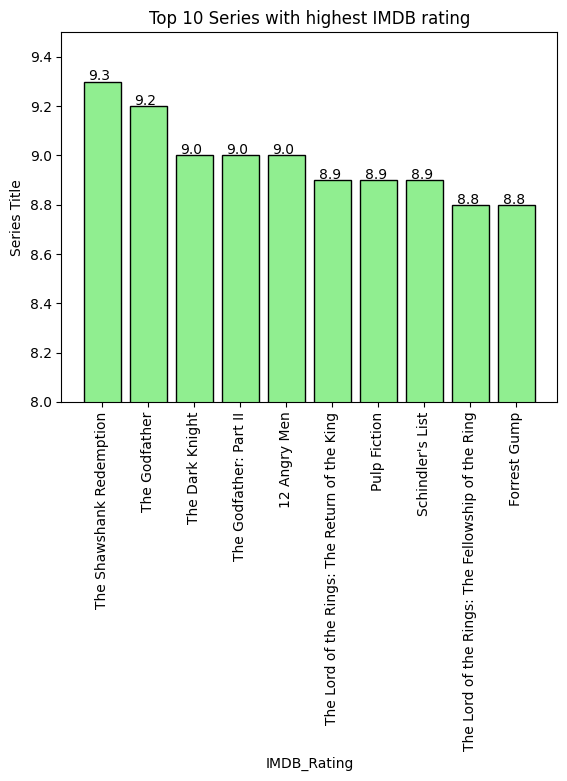

In [203]:
top_N_titles_with_highest_imdb_rating(df,10)

In [79]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

#### Top N directors with most movies, Top N directors with highest IMDB_rated movies

In [87]:
def director_analysis(data,N,M):
    # director with most movies
    w1 = df['Director'].value_counts().sort_values(ascending=False).head(N)
    w2 = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(M)
    
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.barh(w1.index,w1.values,color='orange',edgecolor='black')
    plt.title(f'Top {N} Diretcors with most movies')
    plt.subplot(1,2,2)
    plt.plot(w2.index,w2.values,color='maroon',marker='o')
    plt.title(f'Top {M} Directors with highest AvgRating')
    plt.xticks(rotation=90)
    
    plt.show()

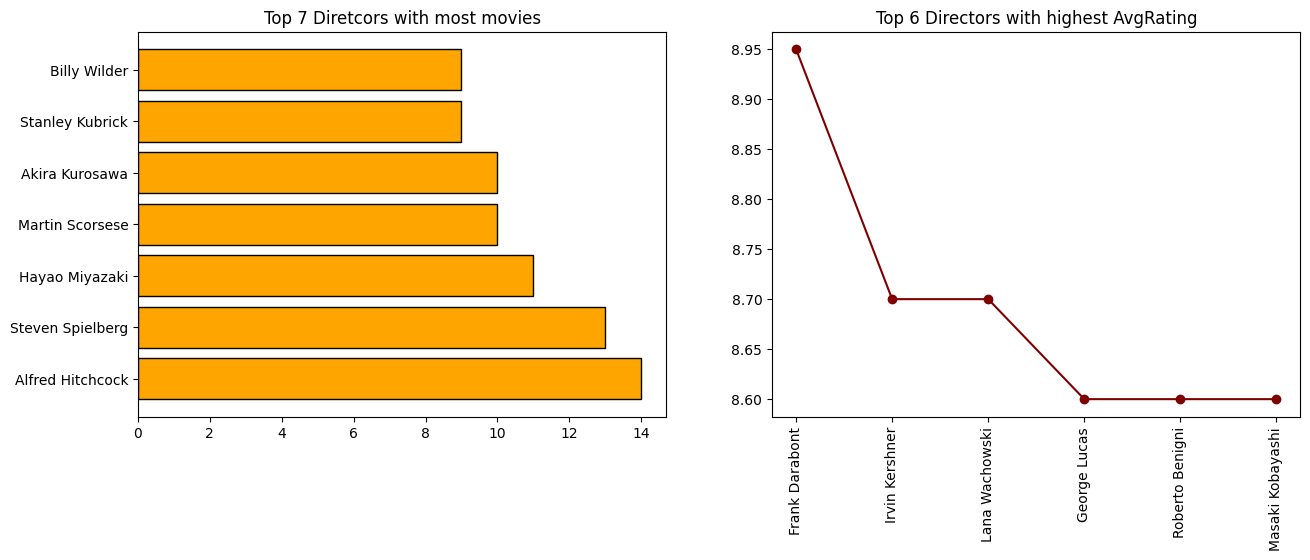

In [88]:
director_analysis(df,7,6)

In [89]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


#### Top N Directors with highest sum of Gross amount collected

In [158]:
def directors_with_highest_gross_amount(data,N):
    w1 = df.groupby(['Director'])['Gross'].sum().sort_values(ascending=False).head(N)
    xran = list(range(len(w1)))
    plt.figure(figsize=(14,5))
    plt.bar(xran,w1.values,color='tan',edgecolor='red')
    for i in range(len(xran)):
        plt.annotate(xy=[xran[i]-0.4,w1.values[i]+100000000],text=(w1.values[i]))
    plt.title(f'Top {N} directors with highest Gross collected')
    plt.ticklabel_format(style='plain',axis='y')
    plt.xticks(xran,w1.index)
    plt.ylim(0,3000000000)
    plt.show()

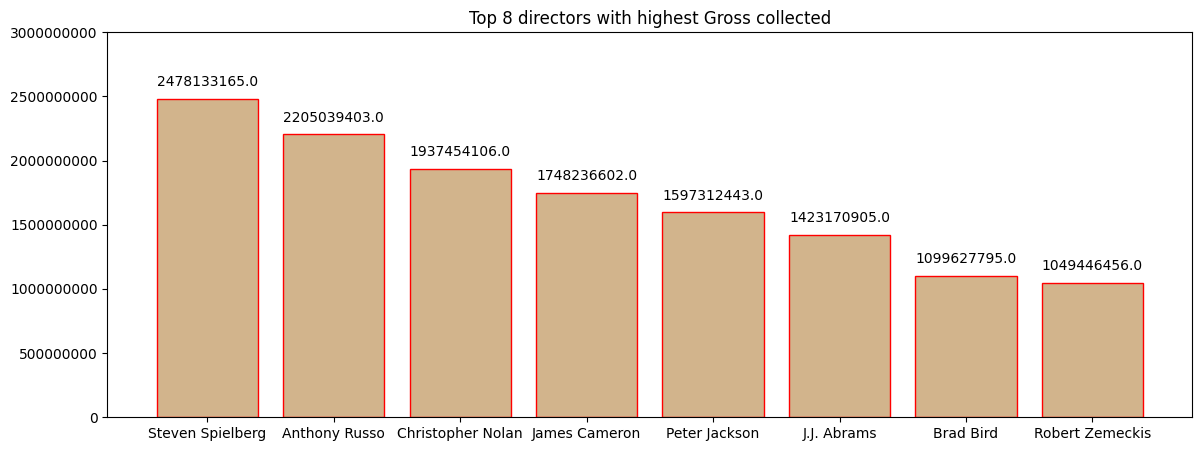

In [159]:
directors_with_highest_gross_amount(df,8)

In [204]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


#### Represent Percentage contribution of Top N genres on Pie Chart

In [209]:
def top_N_genres(data,N):
    w = df['Genre'].value_counts().sort_values(ascending=False).head(N)
    plt.figure(figsize=(8,7))
    plt.pie(w.values,labels=w.index,autopct='%.2f%%')
    plt.title(f'Top {N} genres with most Count')
    plt.show()

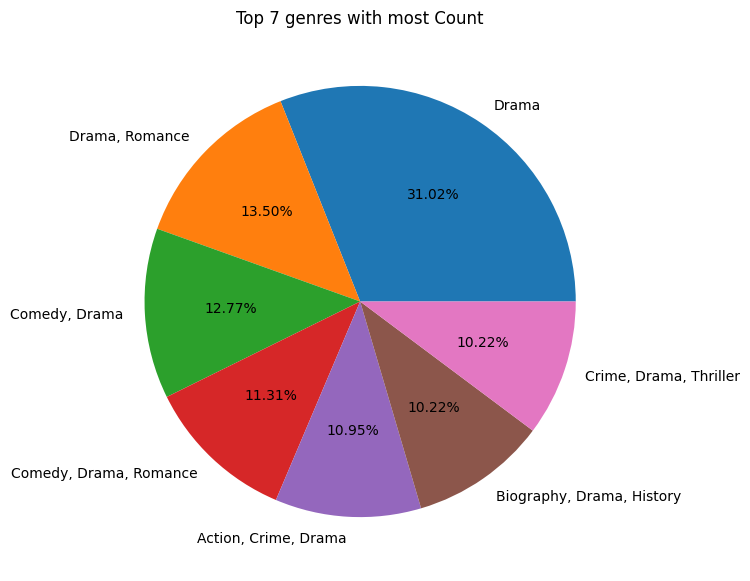

In [210]:
top_N_genres(df,7)

In [211]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0


#### Display boxplots for Runtime, IMDB_rating, meta_Score, No_of Votes and Gross

In [212]:
df.columns

Index(['Series_Title', 'Released_Year', 'Certificate', 'Runtime', 'Genre',
       'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1', 'Star2',
       'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')

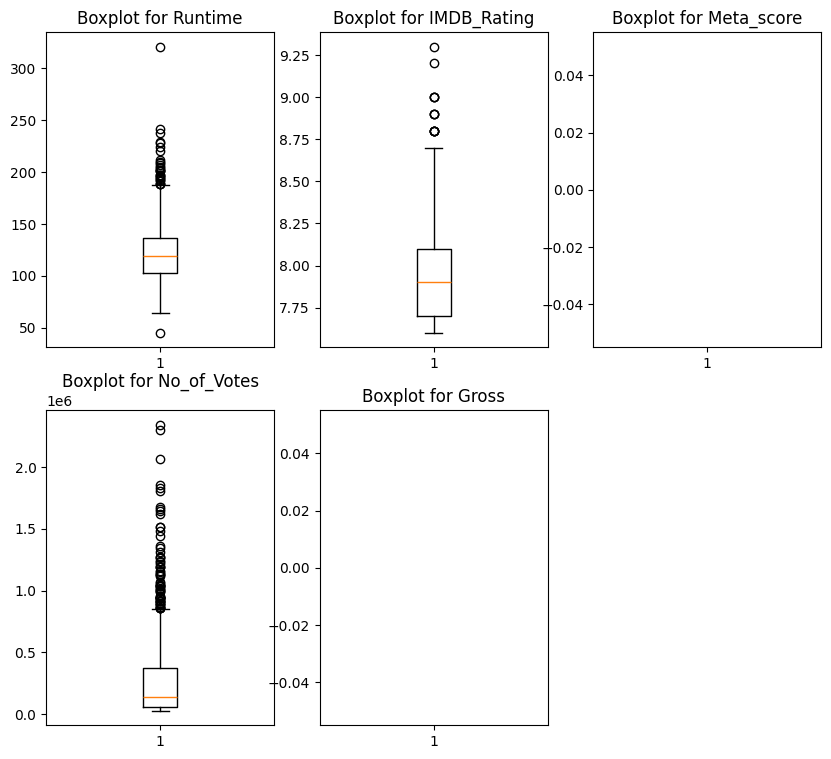

In [214]:
cols = ['Runtime','IMDB_Rating','Meta_score','No_of_Votes','Gross']

plt.figure(figsize=(10,9))
for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    plt.boxplot(df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.show()

In [218]:
df.dtypes

Series_Title      object
Released_Year      int32
Certificate       object
Runtime            int32
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [215]:
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469.0
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
